In [1]:
import pandas as pd
import numpy as np
import pickle as pkl
import os, gc, math, sys, re
import os,sys
import numpy as np
import logging
import pandas as pd
import time

from tqdm import *
from datetime import datetime as dt
from datetime import datetime, timedelta
from multiprocessing import Pool
from multiprocessing.dummy import Pool as ThreadPool
from sklearn.cluster import KMeans
from multiprocessing import Pool
from multiprocessing.dummy import Pool as ThreadPool
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [2]:
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
matplotlib.rc('font', family='DejaVu Sans')
%matplotlib inline

In [3]:
from models import AddFeatures, ExceptFeatures

____

#### Load data

In [4]:
with open('../train_val_test_split.pkl', 'rb') as f:
    train, val, test = pkl.load(f)

In [5]:
train = train.reset_index(drop=True)
val = val.reset_index(drop=True)
test = test.reset_index(drop=True)

In [6]:
features = list(train.columns[14:19]) + list(train.columns[22:])
target = 'time_of_expected'

#### Load results

In [9]:
with open('../fit_models_add_r2.pkl', 'rb') as f:
    fit_models_add_r2 = pkl.load(f)
with open('../fit_models_add_mape.pkl', 'rb') as f:
    fit_models_add_mape = pkl.load(f)

In [10]:
with open('../fit_models_except_r2.pkl', 'rb') as f:
    fit_models_add_r2 = pkl.load(f)
with open('../fit_models_except_mape.pkl', 'rb') as f:
    fit_models_add_mape = pkl.load(f)

#### Make graphs

In [29]:
m = fit_models_add_r2[2]

In [30]:
m.score

[1.7976931348623157e+308]

AddFeatures


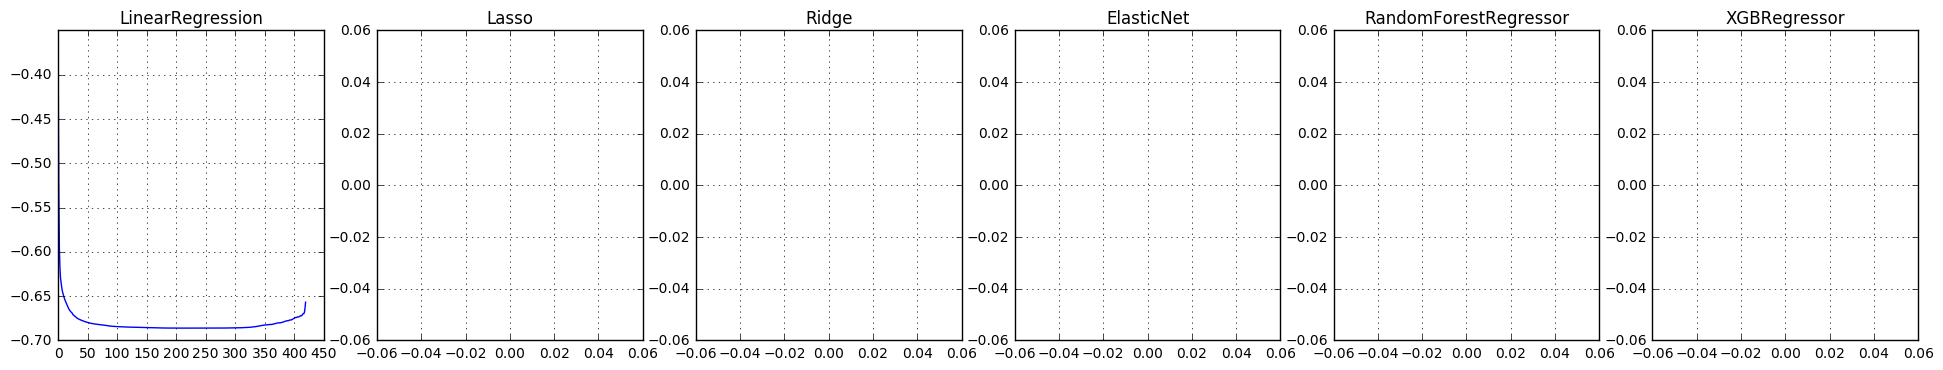

In [46]:
plt.figure(figsize=[24, 4])
print res.__str__().split('(')[0]
for ind, res in enumerate(fit_models_add_r2):
    plt.subplot(1,len(fit_models_add_mape),ind+1)
    plt.plot(res.score[1:-3])
    plt.title(res.model.__str__().split('(')[0])
    plt.grid(True)